<b><font color="red" size="6">ch13. 데이터 시각화</font></b>

# 1절. 시각화 개요
- 시각화 라이브러리 : matplotlib, seaborn, folium(지도시각화)
- matplotlib : 파이썬에서 가장 많이사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib 기반으로 다양한 색, 테마, 차트 기능과 groupby 기능을 추가한 라이브러리

# 2절. matplotlib
- https://pypi.org/project/matplotlib/
- https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py : api reference
## 2.1 패키지 import 및 기본 설정

In [1]:
import matplotlib
matplotlib.__version__

'3.7.0'

In [2]:
import matplotlib.pyplot as plt

In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# 한글설정

# warning(경고) 안보이게
import warnings
# warnings.filterwarnings(action='ignore') # 경고 메세지 안보이게
warnings.filterwarnings(action='default') # 경고 메세지 보이게

## 2.2 그래프 그리기
- matplotlib으로 그래프를 그리기 위한 단계
    1) 데이터 준비<br>
    2) 그래프 생성 <br>
    3) 그래프 함수로 그리기 <br>
    4) 그래프 커스터마이징 <br>
    5) 그래프 출력 및 저장 <br>

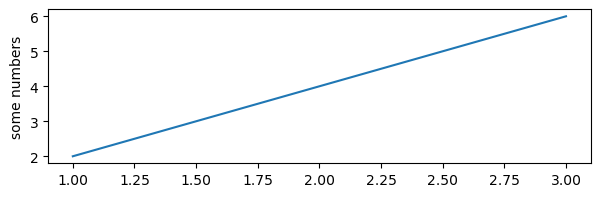

In [10]:
plt.figure(figsize=(7,2)) # 2) 그래프 객체 생성. 사이즈는 인치
plt.plot([1,2,3],[2,4,6]) # 3) 그래프 함수
plt.ylabel('some numbers') # 4) 그래프 커스터마이징
plt.show() #                 5) 그래프 출력

## 2.3 그래프 영역 나누기
### 1) subplot()함수로 서브플롯 추가

In [13]:
import numpy as np
x = np.arange(0,10,0.01)
x.shape

(1000,)

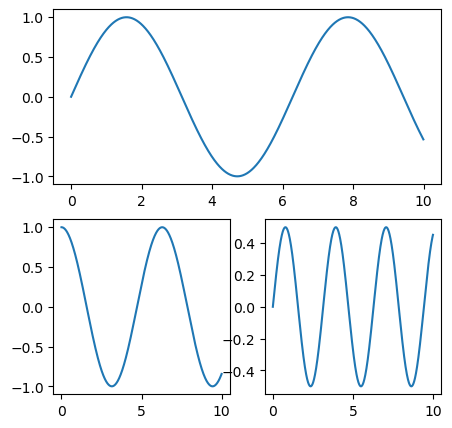

In [22]:
plt.figure(figsize = (5,5))
plt.subplot(2,1,1) # 2행 1열의 subplot에서 1번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x))
plt.subplot(2,2,3) # 2행 2열의 subplot에서 3번째 subplot에 다음과 같이 그래프 그릴거야
# plt.subplot(223)
plt.plot(x, np.cos(x))
plt.subplot(2,2,4) # 2행 2열의 subplot에서 4번째 subplot에 다음과 같이 그래프 그릴거야
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

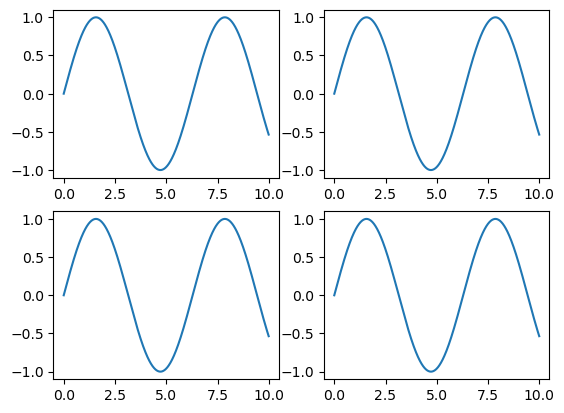

In [24]:
plt.subplot(2,2,1); plt.plot(x, np.sin(x))
plt.subplot(2,2,2); plt.plot(x, np.sin(x))
plt.subplot(2,2,3); plt.plot(x, np.sin(x))
plt.subplot(2,2,4); plt.plot(x, np.sin(x))
plt.show()

### 2) subplots()함수로 서브플롯 추가
- plot함수에서 색상이나 스타일을 조정 : https://wikidocs.net/92085

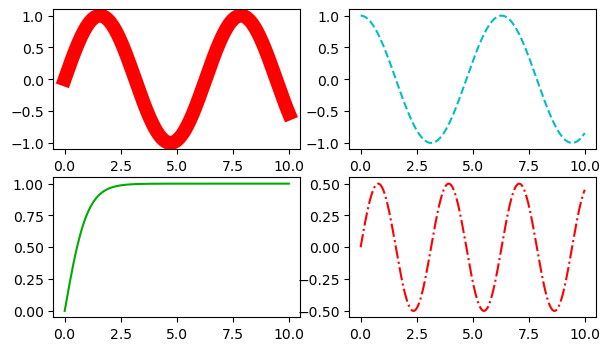

In [40]:
# 2행 2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,4))
axes[0,0].plot(x, np.sin(x), color='r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--')
axes[1,0].plot(x, np.tanh(x), color='#00AA00')
# axes[1,0].plot([0,1,2,3],[-1,-0.5,0,0.5], 'ko:')
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')

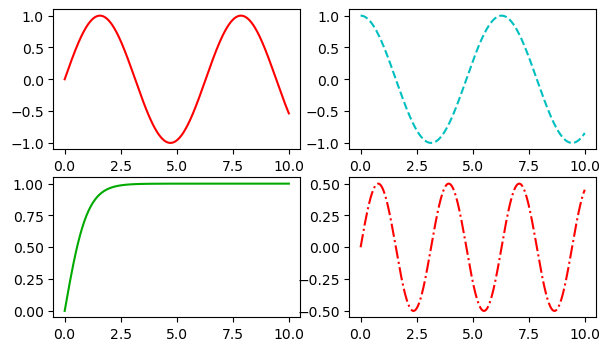

In [46]:
# 2행 2열 서브플롯 (for문 사용)
func_list = [np.sin, np.cos, np.tanh, lambda x:np.sin(x)*np.cos(x)]
form_list = ['r','c--','#00AA00','r-.']
fig, axes = plt.subplots(2, 2, figsize=(7,4))
# list(enumerate(axes.flat))
for idx, ax in enumerate(axes.flat):
    ax.plot(x, func_list[idx](x), form_list[idx])

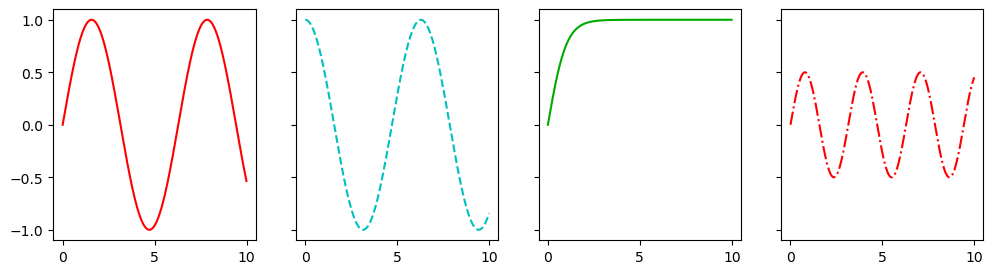

In [53]:
# 1행 4열 서브플롯
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,3), sharey=True) # y축 공유
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), form_list[i])

## 2.4 다양한 그래프 그리기
### 1) pyplot 함수들 : https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.html
### 2) matplotlib.pyplot.plot() : 선그래프

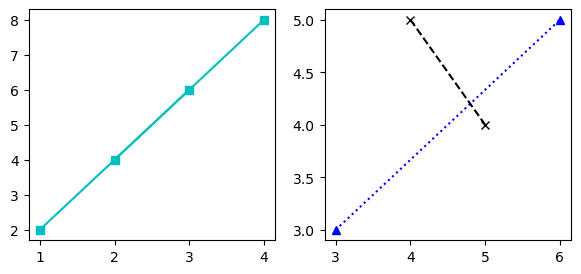

In [57]:
fig, axes = plt.subplots(ncols=2, figsize=(7,3))
axes[0].plot([[1,2],[3,4]],[[2,4],[6,8]], 'cs-') # c : cyan, s : 사각마커, - : 실선
axes[1].plot([3,6],[3,5], 'b^:')
axes[1].plot([4,5],[5,4], 'kx--')

###  3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=None, y=None, kind='line', figsize=None, title=None, grid=None, xlim, ylim.....)
    * kind : line(기본값), scatter(점도표), bar, barh, box, density, pie....
    * figsize : tuple(인치단위)
    * xlim, ylim: list/tuple

In [58]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례 사용

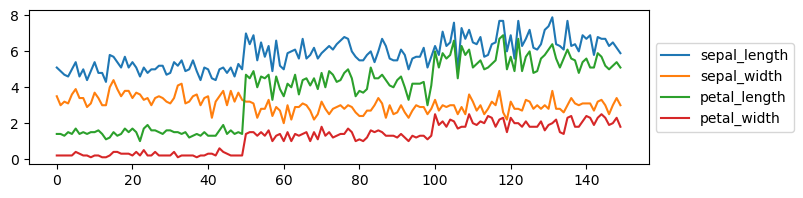

In [65]:
iris.plot(figsize=(8,2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC
- https://matplotlib.org/stable/users/explain/colors/colormaps.html (colormap)

<Axes: title={'center': 'IRIS BoxPlot'}, ylabel='y-value'>

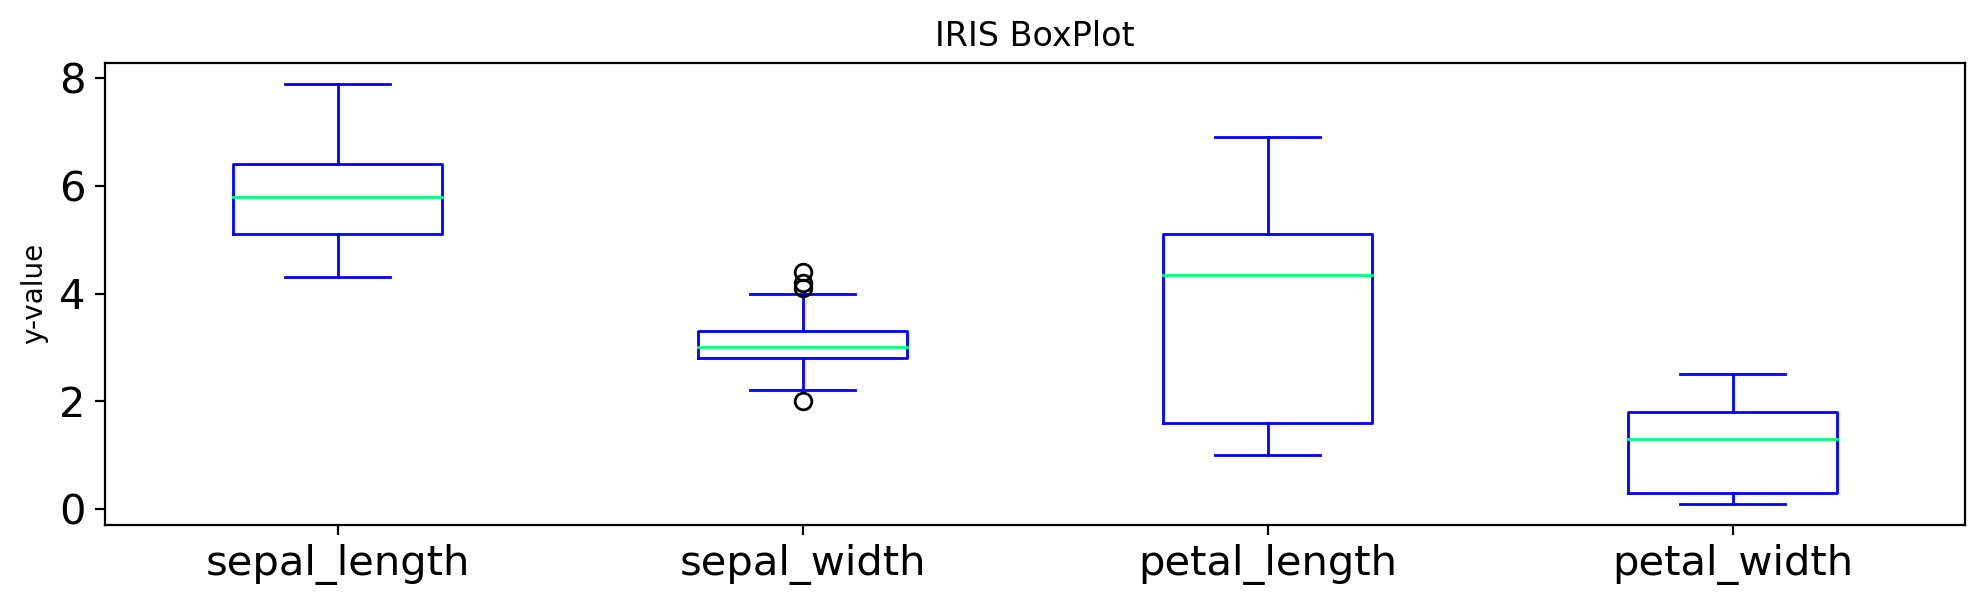

In [79]:
iris.plot(kind='box', figsize=(12,3), title='IRIS BoxPlot', ylabel='y-value', fontsize=15, colormap='winter')

In [74]:
iris.quantile(q=[0,0.25,0.5,0.75,1])

C:\Users\4545\AppData\Local\Temp\ipykernel_5716\273913489.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.quantile(q=[0,0.25,0.5,0.75,1])


,sepal_length,sepal_width,petal_length,petal_width
0.00,4.3,2.0,1.00,0.1
0.25,5.1,2.8,1.60,0.3
0.50,5.8,3.0,4.35,1.3
0.75,6.4,3.3,5.10,1.8
1.00,7.9,4.4,6.90,2.5


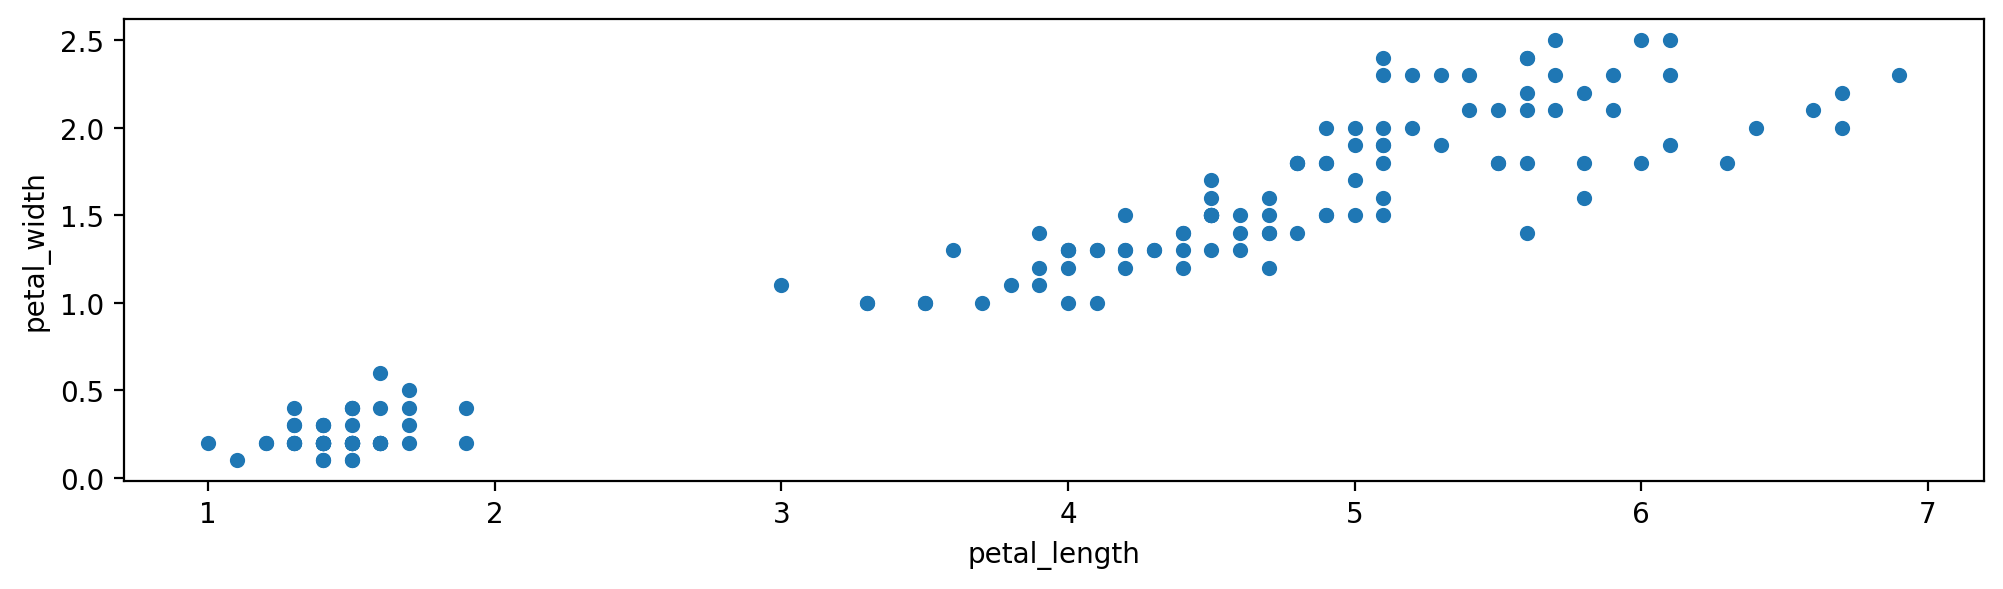

In [78]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3))
plt.show()

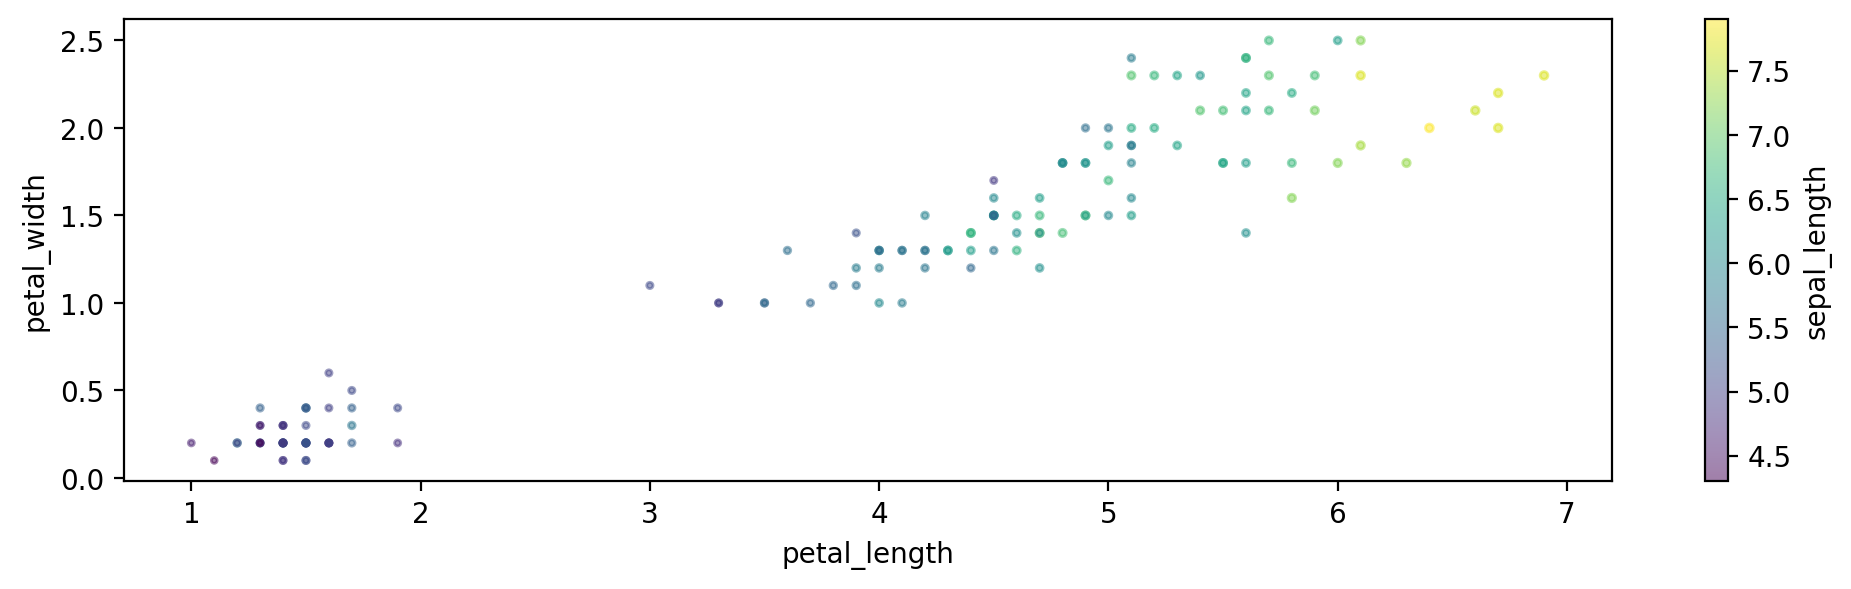

In [88]:
iris.plot(kind='scatter', x='petal_length', y='petal_width', figsize=(12,3), s='sepal_length', c='sepal_length', alpha=.5)
plt.show()

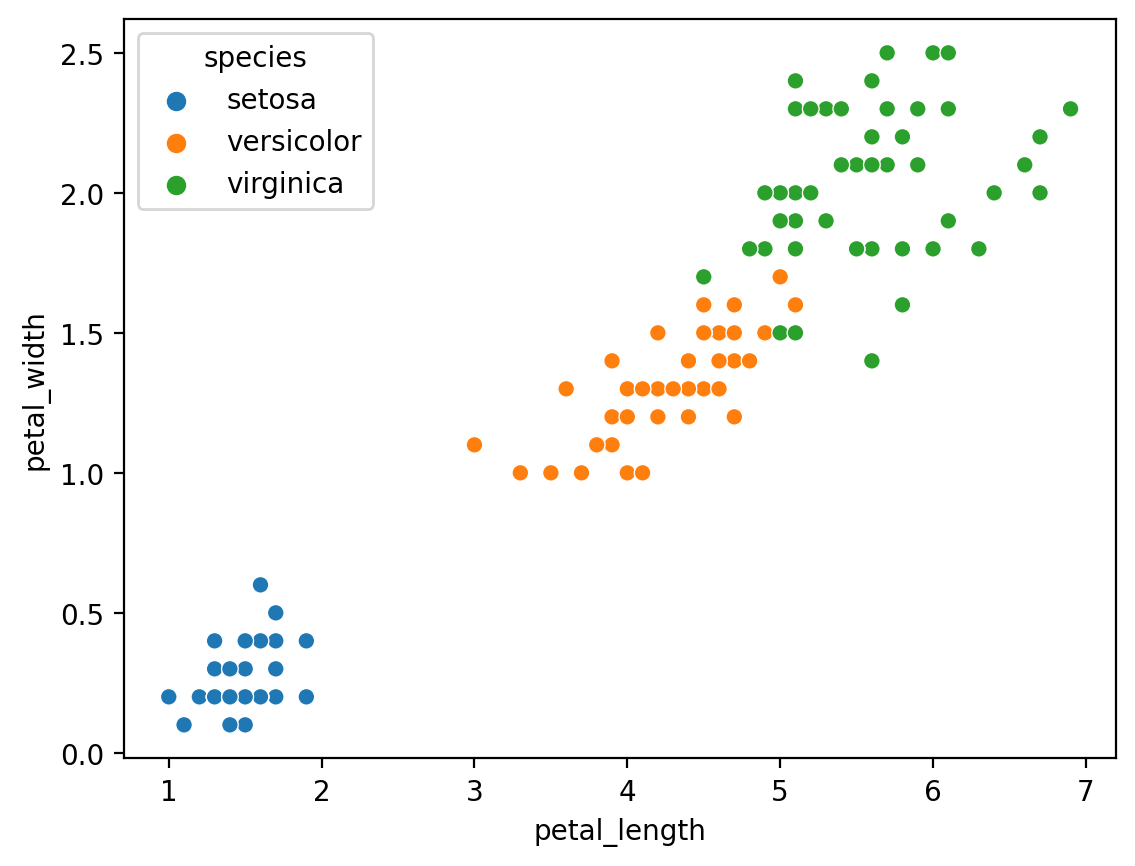

In [92]:
import seaborn as sns
sns.scatterplot(data = iris, x='petal_length', y='petal_width', hue='species')
plt.show()

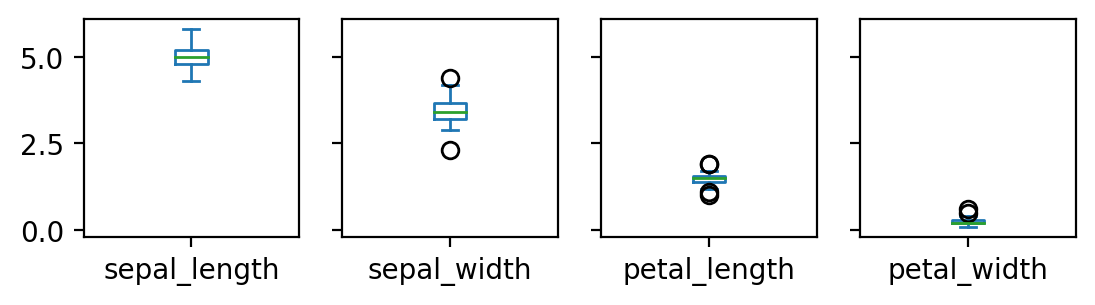

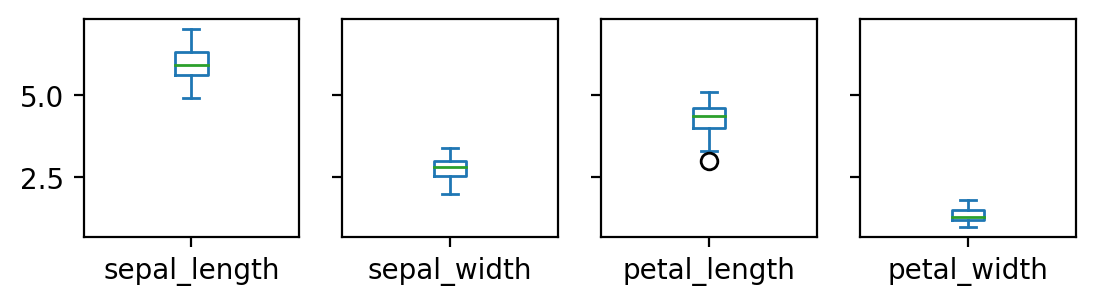

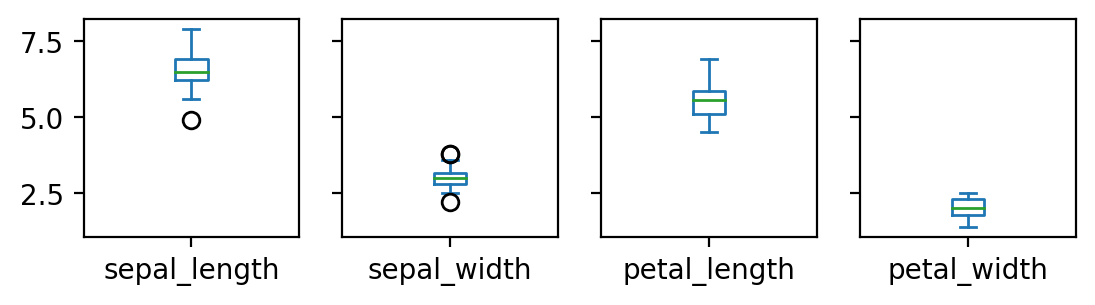

In [98]:
# 종별 boxplot
iris.groupby('species').plot(kind='box', subplots=True, layout=(3,4), sharey=True)
plt.show()

## 4) plt.scatter() : 산점도

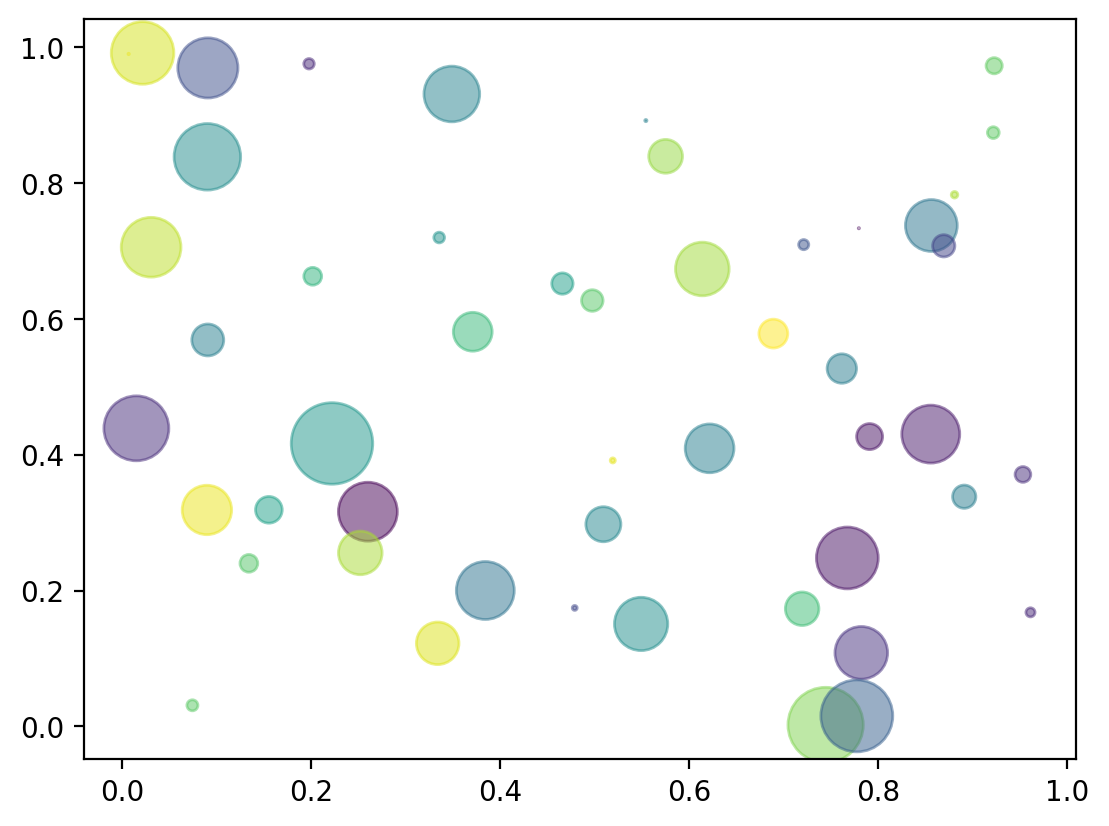

In [101]:
x = np.random.rand(50) # 균등분포의 1차원 난수 50개 발생(배열)
y = np.random.rand(50)
colors = np.random.rand(50)
area = (np.random.rand(50)*30)**2
plt.scatter(x,y, s=area, c = colors, alpha=.5)

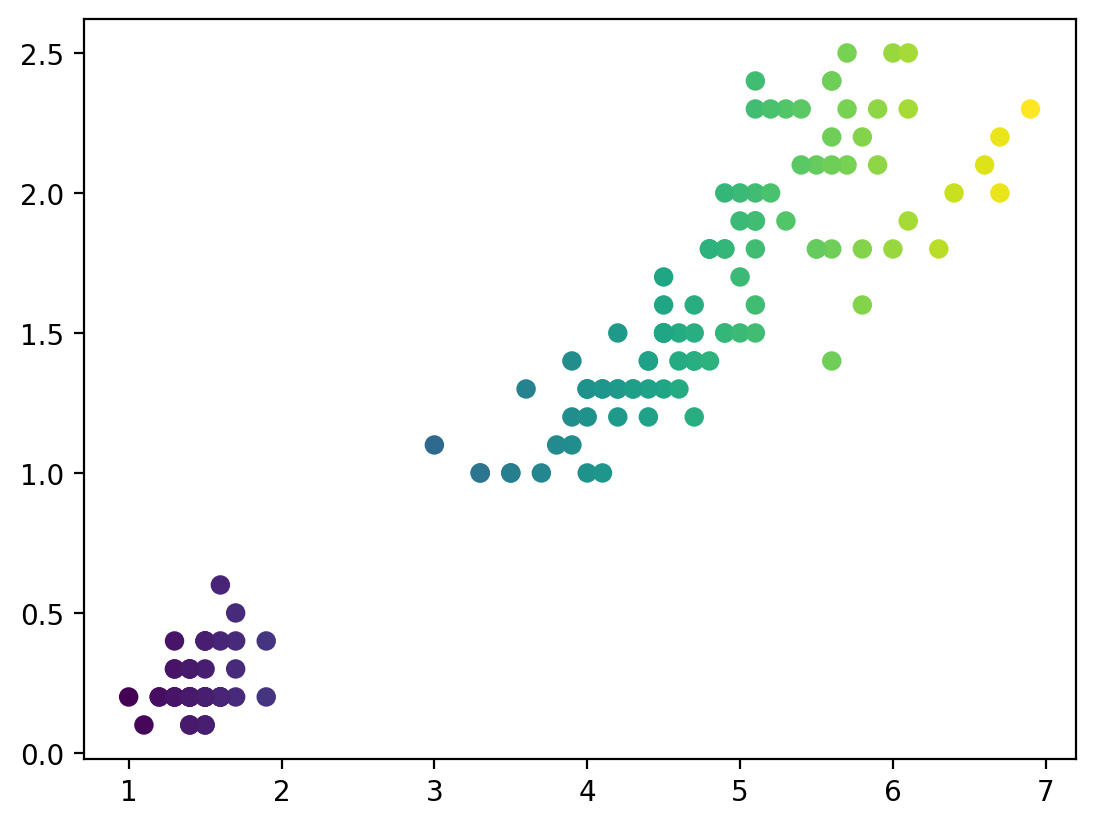

In [104]:
plt.scatter(x=iris.petal_length, y=iris.petal_width, c=iris.petal_length*20)
plt.show()

## 2.5 그외 그래프 그리기
### 1) fill(), fill_between(), scatter()
### 2) bar(), barh(), axvline(), axhline()
### 3) hist(히스토그램), boxplot(분포를몰라), violinplot()

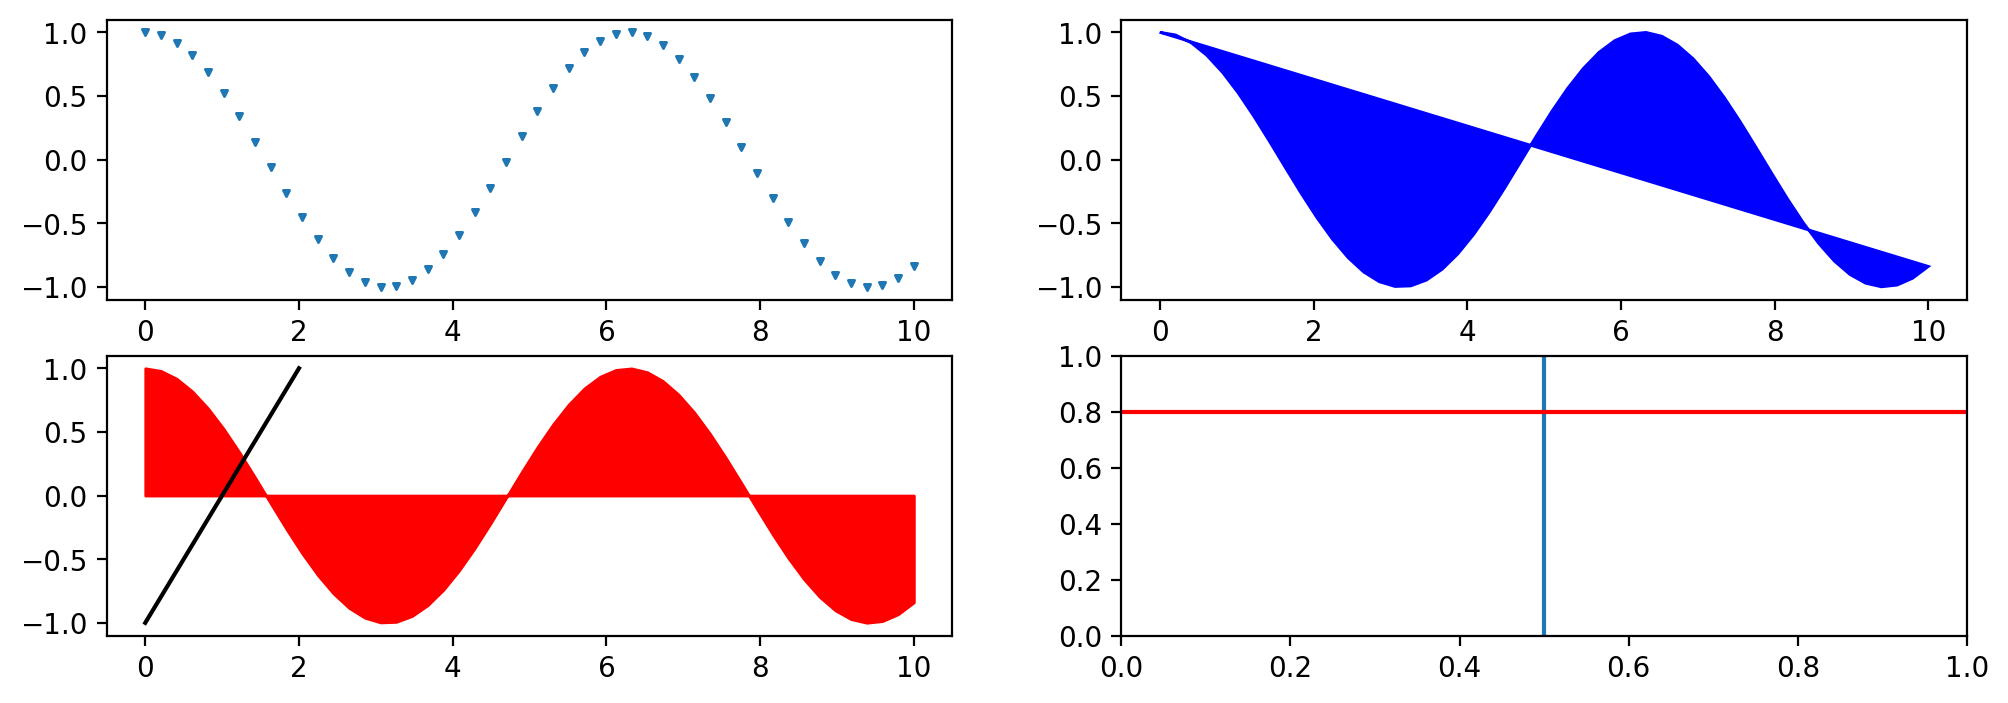

In [119]:
x = np.linspace(0,10) # 0부터 10까지 일정한 간격으로 50개(기본값) 수 추출
y = np.cos(x)
fig, axes = plt.subplots(2,2, figsize=(12,4))
axes[0,0].scatter(x, y, s=5, marker='v')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,0].plot([0,2],[-1,1], 'k')
axes[1,1].axvline(.5)
axes[1,1].axhline(.8, c='r')

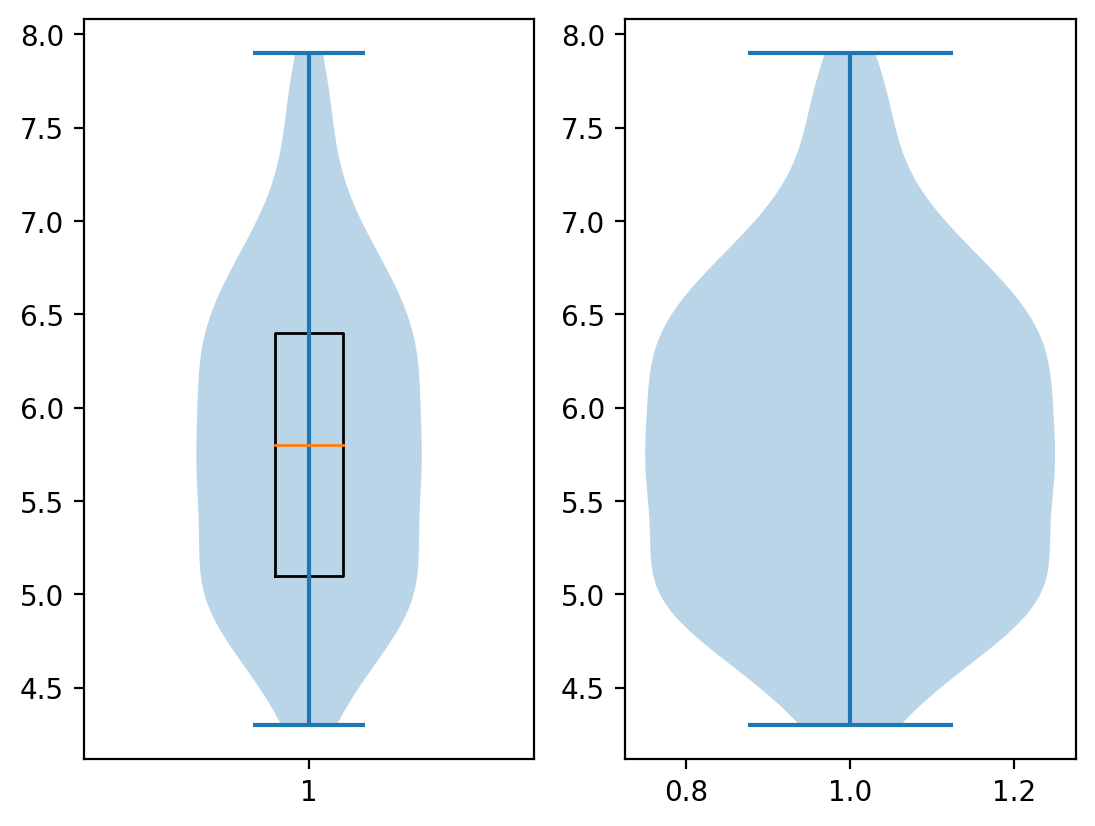

In [125]:
# boxplot vs. violinplot
fig, axes = plt.subplots(ncols = 2)
axes[0].boxplot(iris.sepal_length)
axes[0].violinplot(iris.sepal_length)
axes[1].violinplot(iris.sepal_length)
plt.show()